In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

## Simulating System Performance Data
 
- **CPU Usage**: Percentage of CPU used.
- **Memory Usage**: Percentage of memory used.
- **Disk I/O**: Input/Output operations per second.
- **Paging Space Usage**: Percentage of paging space used by the system.
- **Disk Space Usage**: Percentage of disk space used by the system.
- **Timestamp**: Time at which the metrics are recorded.

In [2]:
# Parameters
num_days = 750
samples_per_day = 48  # One sample per every 30 minutes
total_samples = num_days * samples_per_day

# Generate a time series
start_date = datetime.now() - timedelta(days=num_days)
timestamps = [start_date + timedelta(hours=i/2) for i in range(total_samples)]

# Generate normal CPU, Memory, Disk I/O, Paging Space, and Disk Space usage data
cpu_usage = np.clip(np.random.normal(loc=50, scale=10, size=total_samples), 0, 100)
memory_usage = np.clip(np.random.normal(loc=60, scale=15, size=total_samples), 0, 100)
disk_io = np.clip(np.random.normal(loc=200, scale=50, size=total_samples), 50, 500)
paging_space_usage = np.clip(np.random.normal(loc=40, scale=20, size=total_samples), 0, 100)
disk_space_usage = np.clip(np.random.normal(loc=70, scale=10, size=total_samples), 0, 100)

# Inject anomalies
anomaly_indices = random.sample(range(total_samples), k=int(0.05 * total_samples))

# Increase CPU, Memory, Paging Space, and Disk Space usage drastically for anomalies
for idx in anomaly_indices:
    cpu_usage[idx] = np.clip(cpu_usage[idx] + np.random.normal(loc=50, scale=10), 0, 100)
    memory_usage[idx] = np.clip(memory_usage[idx] + np.random.normal(loc=50, scale=10), 0, 100)
    disk_io[idx] = np.clip(disk_io[idx] + np.random.normal(loc=200, scale=50), 50, 1000)
    paging_space_usage[idx] = np.clip(paging_space_usage[idx] + np.random.normal(loc=50, scale=20), 0, 100)
    disk_space_usage[idx] = np.clip(disk_space_usage[idx] + np.random.normal(loc=20, scale=5), 0, 100)

# Create a DataFrame
data = {
    "Timestamp": timestamps,
    "CPU_Usage": cpu_usage,
    "Memory_Usage": memory_usage,
    "Disk_IO": disk_io,
    "Paging_Space_Usage": paging_space_usage,
    "Disk_Space_Usage": disk_space_usage
}
df = pd.DataFrame(data)


In [3]:
# Display the first few rows
df.head()

,Timestamp,CPU_Usage,Memory_Usage,Disk_IO,Paging_Space_Usage,Disk_Space_Usage
0,2022-08-05 16:17:01.344428,59.212618,65.719579,173.944243,10.334773,57.597664
1,2022-08-05 16:47:01.344428,45.034128,59.181981,94.870193,27.413665,55.500349
2,2022-08-05 17:17:01.344428,55.890298,46.260281,190.675730,47.698669,67.921695
3,2022-08-05 17:47:01.344428,51.914829,64.077158,212.074243,37.443366,60.858160
4,2022-08-05 18:17:01.344428,44.365137,63.331884,202.055206,59.047033,79.553004


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           36000 non-null  datetime64[ns]
 1   CPU_Usage           36000 non-null  float64       
 2   Memory_Usage        36000 non-null  float64       
 3   Disk_IO             36000 non-null  float64       
 4   Paging_Space_Usage  36000 non-null  float64       
 5   Disk_Space_Usage    36000 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.6 MB


## Data Processing and Feature Engineering

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# The number of missing values for each column
print(f"Missing values in each column:{missing_values}")


Missing values in each column:Timestamp             0
CPU_Usage             0
Memory_Usage          0
Disk_IO               0
Paging_Space_Usage    0
Disk_Space_Usage      0
dtype: int64


In [6]:
# Rolling statistics (window of 3 samples)
df['CPU_Rolling_Mean'] = df['CPU_Usage'].rolling(window=3).mean()
df['CPU_Rolling_Std'] = df['CPU_Usage'].rolling(window=3).std()

df['Memory_Rolling_Mean'] = df['Memory_Usage'].rolling(window=3).mean()
df['Memory_Rolling_Std'] = df['Memory_Usage'].rolling(window=3).std()

df['Disk_IO_Rolling_Mean'] = df['Disk_IO'].rolling(window=3).mean()
df['Disk_IO_Rolling_Std'] = df['Disk_IO'].rolling(window=3).std()

df['Paging_Space_Rolling_Mean'] = df['Paging_Space_Usage'].rolling(window=3).mean()
df['Paging_Space_Rolling_Std'] = df['Paging_Space_Usage'].rolling(window=3).std()

df['Disk_Space_Rolling_Mean'] = df['Disk_Space_Usage'].rolling(window=3).mean()
df['Disk_Space_Rolling_Std'] = df['Disk_Space_Usage'].rolling(window=3).std()

# Lag features
df['CPU_Lag_1'] = df['CPU_Usage'].shift(1)
df['Memory_Lag_1'] = df['Memory_Usage'].shift(1)
df['Disk_IO_Lag_1'] = df['Disk_IO'].shift(1)
df['Paging_Space_Lag_1'] = df['Paging_Space_Usage'].shift(1)
df['Disk_Space_Lag_1'] = df['Disk_Space_Usage'].shift(1)

# Difference features
df['CPU_Diff'] = df['CPU_Usage'].diff()
df['Memory_Diff'] = df['Memory_Usage'].diff()
df['Disk_IO_Diff'] = df['Disk_IO'].diff()
df['Paging_Space_Diff'] = df['Paging_Space_Usage'].diff()
df['Disk_Space_Diff'] = df['Disk_Space_Usage'].diff()

# Extract month and week from the Timestamp
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week

# Drop rows with NaN values resulting from rolling calculations
df = df.dropna()

# Display the first few rows of the updated DataFrame
df.head()


,Timestamp,CPU_Usage,Memory_Usage,Disk_IO,Paging_Space_Usage,Disk_Space_Usage,CPU_Rolling_Mean,CPU_Rolling_Std,Memory_Rolling_Mean,Memory_Rolling_Std,...,Disk_IO_Lag_1,Paging_Space_Lag_1,Disk_Space_Lag_1,CPU_Diff,Memory_Diff,Disk_IO_Diff,Paging_Space_Diff,Disk_Space_Diff,Month,Week
2,2022-08-05 17:17:01.344428,55.890298,46.260281,190.675730,47.698669,67.921695,53.379015,7.415342,57.053947,9.902649,...,94.870193,27.413665,55.500349,10.856170,-12.921700,95.805536,20.285004,12.421346,8,31
3,2022-08-05 17:47:01.344428,51.914829,64.077158,212.074243,37.443366,60.858160,50.946418,5.492492,56.506474,9.204837,...,190.675730,47.698669,67.921695,-3.975468,17.816877,21.398513,-10.255302,-7.063535,8,31
4,2022-08-05 18:17:01.344428,44.365137,63.331884,202.055206,59.047033,79.553004,50.723421,5.854222,57.889775,10.078328,...,212.074243,37.443366,60.858160,-7.549692,-0.745274,-10.019037,21.603667,18.694844,8,31
5,2022-08-05 18:47:01.344428,47.803148,59.292253,257.732192,61.168115,71.894729,48.027705,3.779852,62.233765,2.574535,...,202.055206,59.047033,79.553004,3.438010,-4.039631,55.676986,2.121082,-7.658275,8,31
6,2022-08-05 19:17:01.344428,70.763839,46.088321,291.083493,47.467244,61.452203,54.310708,14.352147,56.237486,9.018527,...,257.732192,61.168115,71.894729,22.960691,-13.203932,33.351301,-13.700871,-10.442526,8,31


## Building the Anomaly Detection Model

In [7]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [8]:
# Select relevant features for anomaly detection
features = [feature for feature in df.columns if feature not in ('Timestamp', 'Month', 'Week')]

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

# Predict anomalies
df['Anomaly'] = model.predict(X_scaled)

# The IsolationForest returns -1 for anomalies and 1 for normal instances.
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})

# Count the number of anomalies detected
anomalies = df[df['Anomaly'] == 1]
print(f"Number of anomalies detected: {len(anomalies)}")

# Display few rows of the DataFrame with the anomaly column
df[['Timestamp', 'CPU_Usage', 'Memory_Usage', 'Disk_IO', 'Paging_Space_Usage', 'Disk_Space_Usage', 'Anomaly']].head(10)

Number of anomalies detected: 1800


,Timestamp,CPU_Usage,Memory_Usage,Disk_IO,Paging_Space_Usage,Disk_Space_Usage,Anomaly
2,2022-08-05 17:17:01.344428,55.890298,46.260281,190.675730,47.698669,67.921695,0
3,2022-08-05 17:47:01.344428,51.914829,64.077158,212.074243,37.443366,60.858160,0
4,2022-08-05 18:17:01.344428,44.365137,63.331884,202.055206,59.047033,79.553004,0
5,2022-08-05 18:47:01.344428,47.803148,59.292253,257.732192,61.168115,71.894729,0
6,2022-08-05 19:17:01.344428,70.763839,46.088321,291.083493,47.467244,61.452203,0
7,2022-08-05 19:47:01.344428,66.964254,55.100428,199.312887,37.991529,72.159117,0
8,2022-08-05 20:17:01.344428,40.167416,66.311664,153.907620,49.975925,69.634093,0
9,2022-08-05 20:47:01.344428,59.349248,60.927197,129.505408,49.065176,99.871182,0
10,2022-08-05 21:17:01.344428,41.091180,67.202952,227.341724,39.756817,63.421468,0
11,2022-08-05 21:47:01.344428,36.800212,61.679494,246.078536,47.819211,74.401101,0


In [32]:
from sklearn.cluster import DBSCAN

# Train DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_predictions = dbscan_model.fit_predict(X_scaled)

# DBSCAN labels: -1 indicates anomalies (noise points), other integers are cluster labels
df['DBSCAN_Anomaly'] = (dbscan_predictions == -1).astype(int)

# Count anomalies detected by DBSCAN
dbscan_anomalies = df[df['DBSCAN_Anomaly'] == 1]
print(f"Number of anomalies detected by DBSCAN: {len(dbscan_anomalies)}")

# Display the first few rows of the DataFrame with the DBSCAN anomaly column
df[['Timestamp', 'CPU_Usage', 'Memory_Usage', 'Disk_IO', 'Paging_Space_Usage', 'Disk_Space_Usage', 'DBSCAN_Anomaly']].head()


Number of anomalies detected by DBSCAN: 35998


,Timestamp,CPU_Usage,Memory_Usage,Disk_IO,Paging_Space_Usage,Disk_Space_Usage,DBSCAN_Anomaly
2,2022-08-05 17:17:01.344428,55.890298,46.260281,190.675730,47.698669,67.921695,1
3,2022-08-05 17:47:01.344428,51.914829,64.077158,212.074243,37.443366,60.858160,1
4,2022-08-05 18:17:01.344428,44.365137,63.331884,202.055206,59.047033,79.553004,1
5,2022-08-05 18:47:01.344428,47.803148,59.292253,257.732192,61.168115,71.894729,1
6,2022-08-05 19:17:01.344428,70.763839,46.088321,291.083493,47.467244,61.452203,1


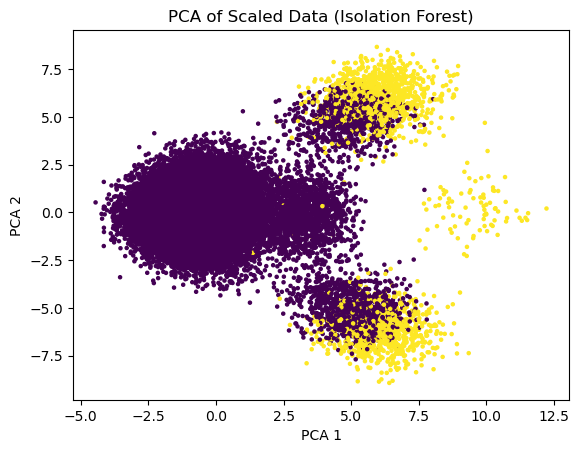

In [34]:
# Visualizing data using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, c=df['Anomaly'])
plt.title('PCA of Scaled Data (Isolation Forest)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
